# Module 3 - LMs/RNNs/LSTMs

## Contents
- Part 1: Recurrent Neural Networks (RNNs)
    - 1.1 A bit more about neural networks
    - 1.2 Language modelling
    - 1.3 Neural language modelling
    - 1.4 RNNs
- Part 2: Sequence to sequence models and machine transition
    - 2.1 Evaluating language models
    - 2.2 Exploding and vanishing gradients
    - 2.3 Long short-term memory (LSTMs) RNNs
    - 2.4 How does LSTM solve vanishing gradients
    - 2.5 Machine Translation
    - 2.6 Neural machine translation introduction
    - 2.7 Evaluation of MT
- Part 3: Attention
    - 3.1 Attention
    - 3.2 Attention Variants 

## Misc and Keywords


# Part 1: Recurrent Neural Networks (RNNs)

## 1.1 A Bit More About Neural Networks

Neural networks struggled to gain traction from the 1980s until the early 2010s. This was primarily due to their poor performance as they became deeper, results often worsened compared to shallow or single-layer networks. It wasn't until around 2010, following a series of small but impactful changes, that neural networks began to show significant improvement. These changes included:

### 1. Regularisation

- Techniques such as L2 regularisation help prevent overfitting, particularly when dealing with a large number of features.
- More recently, the focus has shifted towards producing models that generalise well, even when they are very large.
- In fact, modern large-scale models are often intentionally overfitted to the training data, which paradoxically helps improve performance on test data due to their size.

### 2. Dropout

- A form of regularisation.
- During training, random subsets of the input are "dropped out" (i.e., temporarily ignored).
- This forces the network to become more robust and discourages reliance on any specific input features.
- It helps prevent *feature co-adaptation*, where neurons rely too heavily on each other.

### 3. Vectorisation

- The speed, efficiency, and scalability of modern neural networks are largely thanks to vectorised operations.
- By operating on entire vectors or matrices at once, computations can be significantly accelerated.

### 4. Parameter Initialisation

- Weights should be initialised to small, non-zero random values.
- This breaks symmetry and enables effective learning—initialising everything to zero would prevent this.
- Hidden layer biases, however, are typically initialised to zero.

### 5. Optimisers

- Traditional optimisation techniques like stochastic gradient descent (SGD) are effective, but often require careful tuning of the learning rate.
- For more complex networks, consider using advanced optimisers such as:
  - **Adagrad**
  - **RMSProp**
  - **Adam**
  - **NAdamW** (The 'W' stands for 'weight decay', and it often yields better performance with word vectors.)
- A good starting learning rate for these optimisers is typically around **0.001**.

## 1.2 Language Modelling

Language modelling is the task of predicting the next word in a sequence.

Given a sequence of words $ x^{(1)}, x^{(2)}, \ldots, x^{(t)} $, the objective is to compute a probability distribution over the next word $ x^{(t+1)} $:

$$
P(x^{(t+1)} \mid x^{(t)}, \ldots, x^{(1)})
$$

Here, $ x^{(t+1)} $ can be any word from the vocabulary $ V = \{w_1, w_2, \ldots, w_{|V|}\} $.

Applications of language modelling include:
- Predictive text and auto-complete (e.g. on smartphones)
- Search query suggestions (e.g. Google)
- Speech recognition
- Machine translation
- Text generation

### *n*-gram Models

Before the advent of deep learning, language models were primarily built using *n*-gram models.

An *n*-gram model is a probabilistic model that relies on the **Markov assumption**: it predicts the next word based solely on the preceding $ n-1 $ words, ignoring the rest of the context. That is:

$$
P(x^{(t)} \mid x^{(t-1)}, x^{(t-2)}, \ldots, x^{(t-n+1)})
$$

*n*-grams are constructed by counting the frequency of word sequences in a large corpus of text.

#### Common Issues with *n*-gram Models

- **Sparsity problem**: Many possible word combinations do not occur in the training corpus, resulting in zero probabilities. This can be problematic, as any computation involving a zero-probability word also results in zero.
  
- **Storage and scalability**: As $ n $ increases, the number of possible *n*-grams grows exponentially. Storing all of them becomes computationally expensive, with most systems historically capped at 5-grams or 6-grams.

- **Lack of generalisation**: These models do not learn semantic similarities between words, and cannot generalise to unseen phrases.

#### Smoothing Techniques

To combat sparsity, smoothing techniques such as:
- Laplace (add-one) smoothing,
- Good-Turing discounting,
- or Kneser-Ney smoothing  
were used to assign non-zero probabilities to unseen *n*-grams.

Despite their limitations, *n*-gram models are:
- Conceptually simple,
- Easy to implement,
- And often effective for smaller-scale tasks or domains with limited vocabulary.

They laid the groundwork for the development of more sophisticated neural language models.


## 1.3 Neural Language Modelling

Given a sequence of words, the goal of a neural language model is to assign a probability distribution over what word is likely to come next.

How can we construct such a model using neural networks?

The simplest approach is known as the **fixed-window neural language model**, introduced around 2000–2003. This method aimed to address several limitations of traditional *n*-gram models.

Other approaches to constructing language models are *RNNs* and *Transformers*.

### Fixed-Window Neural Language Model

#### Key Advantages:
- Avoids the sparsity problem present in *n*-gram models.
- Does not require storing all observed *n*-grams explicitly.
- Learns distributed word representations (word embeddings), allowing the model to generalise better across similar words.

However, this approach has its limitations:

- The context window is fixed and small.
- Increasing the window size increases the number of model parameters (specifically the size of the weight matrix $ W $).
- No matter how large the window, it can never fully capture long-range dependencies in language.

#### Model Structure

A basic fixed-window neural language model works as follows:

1. **Input**: A fixed-size window of $ n $ words, e.g., $ x^{(1)}, x^{(2)}, \ldots, x^{(n)} $.
2. **Word Embeddings**: Each word $ x^{(i)} $ is mapped to a vector representation $ e^{(i)} $.
3. **Concatenation**: Combine the embeddings into a single input vector:
   $$
   e = [e^{(1)}, e^{(2)}, \ldots, e^{(n)}]
   $$
4. **Hidden Layer**: Compute the hidden state using a non-linear transformation:
   $$
   h = f(We + b_1)
   $$
   where $ W $ is the weight matrix, $ b_1 $ is the bias, and $ f $ is a non-linear activation function (e.g., ReLU or tanh).
5. **Output Layer**: Compute the probability distribution over the vocabulary using a softmax layer:
   $$
   \hat{y} = \text{softmax}(Uh + b_2)
   $$

This model outputs a probability distribution $ \hat{y} $, where each value corresponds to the likelihood of a word in the vocabulary being the next word.

#### Limitations

While the fixed-window model represented a major step forward, it still suffered from key issues:

- It cannot handle input sequences of variable length.
- It struggles with long-term dependencies due to the limited size of the input context.

These limitations led to the development of more advanced models such as **Recurrent Neural Networks (RNNs)**, which can process sequences of arbitrary length and capture temporal dependencies in the data more effectively.

## 1.4 Recurrent Neural Networks (RNNs)

### Key Advantages

- An RNN can process input sequences of **any length**.
- Computation at time step $ t $ can, in theory, utilise information from many previous steps.
- The **model size remains fixed**, regardless of the length of the input sequence.
- **Weights are shared across time steps**, ensuring consistent processing of inputs and reducing the number of parameters to learn.

These features make RNNs far more flexible than fixed-window models, particularly for tasks involving natural language.

### Limitations

Despite their strengths, RNNs also have several drawbacks:

- **Computation is inherently sequential**, making training and inference slower than fully parallel models (e.g., Transformers).
- In practice, **long-term dependencies are difficult to capture** due to issues like vanishing or exploding gradients during backpropagation.
- Memory of earlier inputs **decays over time**, especially with long sequences.

### Model Structure

A basic RNN for language modelling is conceptually similar to the fixed-window neural language model, with key improvements:

- **It processes inputs sequentially**, one word at a time.
- **It maintains a hidden state**, which captures information from all previous steps.
- **It supports variable-length sequences**, eliminating the need for a fixed input window.
- **It reuses parameters across time**, which promotes generalisation and efficiency.

#### Step-by-Step Breakdown

1. **Input**: At each time step $ t $, the model receives a word $ x^{(t)} $.
2. **Embedding**: This word is mapped to an embedding vector $ e^{(t)} $.
3. **Recurrent Update**: The hidden state is updated using:
   $$
   h^{(t)} = f(W_h h^{(t-1)} + W_e e^{(t)} + b)
   $$
   where:
   - $ W_h $ is the recurrent weight matrix,
   - $ W_e $ projects the embedding into the hidden state space,
   - $ f $ is a non-linear activation function (commonly tanh or ReLU),
   - $ b $ is the bias term.

4. **Output Layer**: The hidden state is passed through a softmax layer to produce a probability distribution over the next word:
   $$
   \hat{y}^{(t)} = \text{softmax}(U h^{(t)} + b_2)
   $$

### Training an RNN

To train an RNN for language modelling:

1. **Corpus**: Obtain a large corpus of text, represented as sequences of words.
2. **Forward Pass**: Feed the sequences into the RNN and compute the output distributions $ \hat{y}^{(t)} $ at each time step.
   - The goal is to predict the probability distribution of the next word given all previous words.
3. **Loss Calculation**: At each time step $ t $, compute the cross-entropy loss between the predicted distribution $ \hat{y}^{(t)} $ and the actual next word $ y^{(t)} $.
4. **Objective Function**: Aggregate the losses over the full sequence and compute the average per word. The objective is to minimise this average loss.
5. **Parameter Updates**: Use the loss to compute gradients and update the model parameters.
   - Computing loss and gradients over the entire corpus is computationally expensive.
   - In practice, we train on smaller chunks (e.g., a sentence or a paragraph) using **stochastic gradient descent (SGD)** or one of its variants.

> **Note**: Advanced techniques such as gradient clipping, truncated backpropagation through time (TBPTT), and batch processing are commonly used to make training more stable and efficient.

# Part 2: Sequence-to-Sequence Models and Machine Translation

## 2.1 Evaluating Language Models

The most common way to evaluate language models is through a metric known as **perplexity**.

Perplexity is a measure of how well a language model predicts a sequence. Formally, for a given sequence of words $x^{(1)}, x^{(2)}, \ldots, x^{(T)}$, the perplexity is defined as:

$$
\text{Perplexity} = \exp\left(-\frac{1}{T} \sum_{t=1}^{T} \log P(x^{(t)} \mid x^{(1)}, \ldots, x^{(t-1)})\right)
$$

Alternatively, if the model outputs cross-entropy loss $L$ averaged over the sequence, perplexity can be computed as:

$$
\text{Perplexity} = e^{L}
$$

### Intuition

Simply put, **perplexity measures how 'confused' the model is when making predictions**. A lower perplexity indicates that the model assigns higher probabilities to the correct next words in a sequence, meaning it is more confident and accurate.

- If a model predicts the next word perfectly every time, its perplexity will be 1.
- If it is highly uncertain, assigning low probabilities to the true next word, its perplexity will be high.

### Interpretation

- **Perplexity is exponential in the average negative log-likelihood**, which means small changes in perplexity can reflect significant improvements in model performance.
- In practice, perplexity is often used to compare language models trained on the same dataset.
- However, it is **not always correlated with downstream task performance** (e.g., translation quality or dialogue coherence), so it should be used alongside task-specific evaluation metrics.


> **Note**: Perplexity depends on the size and domain of the dataset. A model trained on news articles may have low perplexity on similar content, but perform poorly on informal text like social media posts.



## 2.2 Exploding and Vanishing Gradients

When training recurrent neural networks (RNNs), two major issues often arise during backpropagation through time (BPTT): **vanishing gradients** and **exploding gradients**. These problems can severely affect the ability of the model to learn long-range dependencies.

### Vanishing Gradients

Vanishing gradients occur when the gradients of the loss function with respect to earlier layers become extremely small during backpropagation. This means that the weights in early layers receive little to no update, preventing the model from learning from long-term context.

#### Mathematical Intuition

Let the hidden state at time $t$ be computed as:

$$
h^{(t)} = f(W_h h^{(t-1)} + W_e e^{(t)} + b)
$$

During backpropagation, the gradient of the loss with respect to the parameters involves the product of many Jacobian matrices:

$$
\frac{\partial L}{\partial h^{(t-n)}} = \prod_{k=t-n+1}^{t} \frac{\partial h^{(k)}}{\partial h^{(k-1)}} \cdot \frac{\partial L}{\partial h^{(t)}}
$$

If the norm of the Jacobian $\|\frac{\partial h^{(k)}}{\partial h^{(k-1)}}\| < 1$, then the product of these terms approaches zero exponentially as $n$ increases.

This leads to vanishing gradients.

### Exploding Gradients

Exploding gradients occur when the gradient values grow exponentially as they are backpropagated through time. This leads to numerical instability, where the model parameters may become NaN or diverge entirely.

This typically happens when the norm of the Jacobian is greater than 1:

$$
\|\frac{\partial h^{(k)}}{\partial h^{(k-1)}}\| > 1
$$

### Mitigation Strategies

#### 1. Gradient Clipping

This involves scaling the gradients when their norm exceeds a certain threshold. Pseudo-code:

```python
if norm(gradients) > threshold:
    gradients = gradients * (threshold / norm(gradients))
```

This ensures that the gradients remain within a manageable range, preventing them from exploding.

#### 2. Proper Weight Initialisation

Using techniques such as Xavier (Glorot) or He initialisation can help control the scale of activations and gradients.

#### 3. Use of Gated Architectures

Models like LSTMs (Long Short-Term Memory) and GRUs (Gated Recurrent Units) are specifically designed to mitigate the vanishing gradient problem through the use of gating mechanisms that control information flow.

#### 4. Normalisation Techniques

Batch Normalisation or Layer Normalisation can help stabilise the training process by maintaining consistent distributions of activations and gradients.



## 2.3 Long short-term memory (LSTMs) RNNs

Proposed as a solution to the vanishing gradient problem in 1997. The idea was that, unlike basic RNNs, we could increase the short-term memory, and thus produce a long short-term memory. 

### Hidden State and Cell State

At each time step, an LSTM maintains both:

- a **hidden state** $ h^{(t)} $, and  
- a **cell state** $ c^{(t)} $

Both are vectors of length $ n $.

### Key Concepts

- The **cell state** is used to store long-term information across time steps.
- The LSTM can **read**, **erase**, and **write** information to and from the cell state.
- Conceptually, the cell state acts somewhat like **RAM** in a computer.
- The **selection of which information is read, erased, or written** is managed by three corresponding **gates**.

### Gates

In an LSTM, gates are used to control the flow of information into, within, and out of the cell state. These gates are crucial for managing long-term dependencies in sequential data.

- Gates are components of the model whose values are **probabilities** between 0 and 1, computed dynamically at each time step.
- Each gate is also a vector of length $ n $, with one value per cell dimension.

At each time step $t$, the LSTM takes in:
- An input vector $x^{(t)}$,
- The previous hidden state $h^{(t-1)}$,
- And the previous cell state $c^{(t-1)}$.

Let's define each of the gates and their roles.

### 1. Forget Gate

The **forget gate** determines what information from the previous cell state should be discarded.

**Formula:**
$$
f^{(t)} = \sigma(W_f [h^{(t-1)}, x^{(t)}] + b_f)
$$

- $f^{(t)}$ is the forget gate vector (values between 0 and 1).
- $\sigma$ is the sigmoid activation function.
- $W_f$ is the weight matrix for the forget gate.
- $b_f$ is the bias term.

> A value close to 0 means "forget this piece of information", while a value close to 1 means "retain it".

### 2. Input Gate

The **input gate** decides what new information will be written to the cell state.

**Formula (gate and candidate values):**
$$
i^{(t)} = \sigma(W_i [h^{(t-1)}, x^{(t)}] + b_i)
$$
$$
\tilde{c}^{(t)} = \tanh(W_c [h^{(t-1)}, x^{(t)}] + b_c)
$$

- $i^{(t)}$ is the input gate vector.
- $\tilde{c}^{(t)}$ is the candidate values to potentially add to the cell state.
- $\tanh$ squashes values to between -1 and 1.

> The input gate controls *how much* of each candidate value gets written to the cell.

### 3. Cell State Update

The cell state is updated by combining the old state and the new candidate values:

**Formula:**
$$
c^{(t)} = f^{(t)} \odot c^{(t-1)} + i^{(t)} \odot \tilde{c}^{(t)}
$$

- $\odot$ denotes element-wise multiplication.

> This equation shows how the forget gate scales the old cell state and the input gate scales the new content being added.

### 4. Output Gate

The **output gate** controls what information from the cell state should be output as the new hidden state.

**Formula:**
$$
o^{(t)} = \sigma(W_o [h^{(t-1)}, x^{(t)}] + b_o)
$$
$$
h^{(t)} = o^{(t)} \odot \tanh(c^{(t)})
$$

- $o^{(t)}$ is the output gate vector.
- $h^{(t)}$ is the new hidden state.

> This gate determines which parts of the cell state are exposed to the next layer or next time step.


### Summary of LSTM Gate Functions

| Gate         | Function                                  | Output Range |
|--------------|-------------------------------------------|--------------|
| Forget Gate  | Decides what to discard from cell state   | [0, 1]       |
| Input Gate   | Decides what to write to cell state       | [0, 1]       |
| Output Gate  | Decides what to reveal from cell state    | [0, 1]       |

These gates work together to allow the LSTM to retain or discard information in a controlled and differentiable manner, making it powerful for tasks that require understanding long-term dependencies, such as language modelling and machine translation.


## Visual Representation

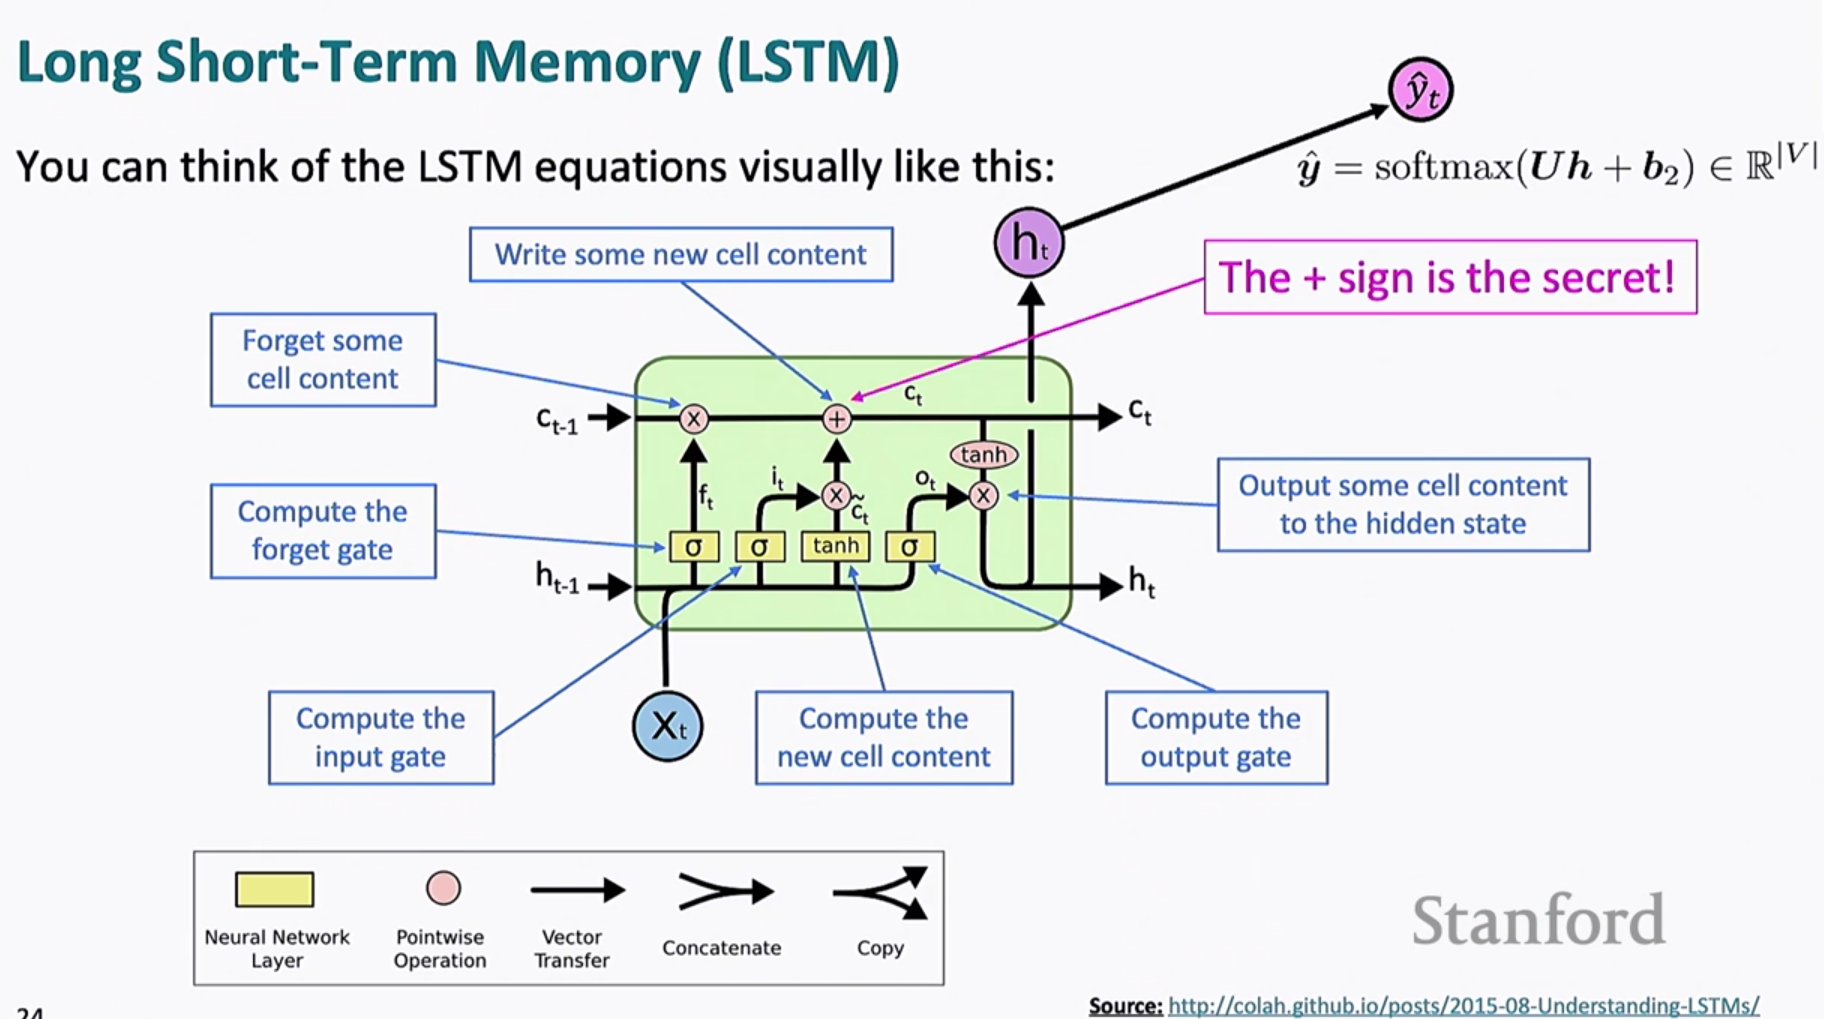

## 2.4 How LSTMs Address the Vanishing Gradient Problem

The architecture of an LSTM makes it significantly easier for a recurrent neural network (RNN) to preserve information over many time steps. This is one of the key reasons LSTMs are effective at modelling long-range dependencies in sequential data.

### The Core Idea

In traditional RNNs, repeated multiplication during backpropagation causes gradients to either vanish (approach zero) or explode (grow uncontrollably). This makes it extremely difficult to learn relationships that span long sequences.

LSTMs help address the **vanishing gradient problem** through the design of the **cell state**, which acts as a kind of memory. The cell state allows gradients to flow more smoothly across many time steps due to:

- **Additive updates** rather than purely multiplicative ones, reducing the chances of the gradient shrinking excessively.
- **Gating mechanisms** (forget, input, output gates) that regulate the flow of information and gradients in a differentiable way.

This means that the LSTM is explicitly designed to retain and propagate gradients over long sequences, avoiding the bottleneck seen in vanilla RNNs.

### Skip Connections and Deep Networks

It is important to note that **vanishing and exploding gradients are not unique to RNNs**. They also affect **deep feedforward networks**. One common solution to this problem is the use of **skip connections**, also known as **residual connections**.

#### Residual Networks (ResNets)

In ResNets, layers are modified so that the output of a layer is added directly to the output of a deeper layer. Formally:

$$
y = F(x) + x
$$

This identity connection allows information, and gradients, to flow more directly through the network, helping preserve features and stabilise training. Residual connections have been especially influential in computer vision tasks.

#### Dense Networks (DenseNets)

DenseNets extend this idea further. In a DenseNet, **every layer is connected to every other future layer** in a feedforward fashion. This ensures maximum information flow between layers and helps with:

- Feature reuse
- Improved gradient flow
- Reduced parameter inefficiency



## 2.5 Machine Translation

**Machine Translation (MT)** is the task of automatically translating a sentence $ x $ from one language (the **source language**) into a sentence $ y $ in another language (the **target language**).

Formally, given a source sentence:
$$
x = (x^{(1)}, x^{(2)}, \ldots, x^{(T_x)})
$$

the goal is to generate a target sentence:
$$
y = (y^{(1)}, y^{(2)}, \ldots, y^{(T_y)})
$$

such that $ y $ is a faithful and fluent translation of $ x $.

### Key Challenges

- **Word Order Differences**: Languages often differ in their syntactic structure (e.g., Subject-Verb-Object vs Subject-Object-Verb).
- **Ambiguity**: Words can have multiple meanings depending on context.
- **Morphology**: Some languages are more inflected than others, which affects how grammatical information is expressed.
- **Context Sensitivity**: Effective translation often depends on context beyond the sentence level.

### Applications

- Real-time translation tools (e.g., Google Translate)
- Multilingual communication (e.g., customer support, diplomacy)
- Content localisation (e.g., software, websites, subtitles)

## 2.6 Introduction to Neural Machine Translation

**Neural Machine Translation (NMT)** is an approach to machine translation that uses a single, end-to-end neural network. This architecture is commonly referred to as a **sequence-to-sequence (seq2seq)** model.

### Architecture Overview

A typical seq2seq model consists of the following components:

1. **Encoder**: Processes the input sentence in the source language and encodes it into a fixed- or variable-length context vector.
2. **Decoder**: Generates the output sentence in the target language, one word at a time, based on the encoded input and previously generated words.

The overall flow is:

**Input → Encoder → Decoder → Output**

### Applications of Encoder-Decoder Networks

Seq2seq architectures are not limited to translation. They are widely used in tasks such as:

- Text summarisation  
- Text-to-speech synthesis  
- Code generation (e.g. translating English to Python)

### Attention Mechanisms

One limitation of early seq2seq models was their reliance on a fixed-length context vector, which made it difficult to handle long or complex sentences effectively.

To overcome this, modern architectures, especially Transformer based models, introduce **attention mechanisms**. These allow the decoder to dynamically attend to different parts of the input sentence at each time step, improving translation quality and performance.

### Seq2seq as a Conditional Language Model

A sequence-to-sequence model can be viewed as a **conditional language model**. Why?

- It is a **language model** because the decoder predicts the next word in the output sequence.
- It is **conditional** because these predictions are made **in context of** the input sentence (i.e., conditioned on the source sequence).

> In other words, the decoder models the probability:
> $$
 P(y^{(t)} \mid y^{(1)}, \ldots, y^{(t-1)}, x)
 $$

where $x $ is the input sentence and $y $ is the target sentence being generated.


This conditional setup allows neural machine translation systems to generate fluent and contextually appropriate output, making them highly effective for a wide range of language tasks.

### How Do We Evaluate Machine Translation?

The most commonly used metric for evaluating machine translation systems is **BLEU**, which stands for **Bilingual Evaluation Understudy**.

BLEU measures how similar a machine-generated translation is to one or more human-generated reference translations. It is a form of **automatic evaluation** that does not require human judgement during scoring.

### How BLEU Works

BLEU computes a similarity score based on:

- The **geometric mean of n-gram precision scores** (typically for 1-gram to 4-gram matches).
  - That is, how many n-grams in the system's translation also appear in the reference translations.
- A **brevity penalty**, which discourages the system from producing translations that are too short.

### Formula (Simplified)

Let $p_n $ be the precision for n-grams. The BLEU score is roughly computed as:

$$
\text{BLEU} = \text{BP} \cdot \exp\left( \sum_{n=1}^{N} w_n \log p_n \right)
$$

- $\text{BP} $ is the brevity penalty.
- $w_n $ are weights (typically uniform, e.g., 0.25 for 1- to 4-grams).
- $p_n $ is the precision for n-grams of length $n $.

### Key Points

- BLEU is **corpus-level**, meaning it works best when calculated over a large set of sentences rather than single examples.
- It rewards **exact matching** of phrases and word order but does **not directly measure semantic correctness**.
- BLEU is fast and reproducible, which is why it's widely used in research and development.

> While BLEU remains the standard for benchmarking MT systems, it is often complemented by other metrics (e.g., METEOR, TER, or COMET) and human evaluation, especially for high-stakes or nuanced translation tasks.


# Part 3: Attention

## 3.1 Attention

**Attention**, introduced in 2014, significantly enhanced the capability of neural networks, especially for tasks involving sequential data such as machine translation, summarisation, and question answering.

The core idea is that **at each time step of the decoder**, the model does not rely solely on a fixed-length context vector from the encoder. Instead, it uses a **direct connection to the encoder's hidden states** to dynamically **focus on relevant parts** of the input sequence.

This mechanism allows the model to learn **where to look** in the input when generating each word in the output.

### Motivation

In traditional sequence-to-sequence models, the entire input sequence is compressed into a single context vector (the encoder’s final hidden state), which can become a bottleneck—especially for long sentences. Attention solves this by giving the decoder access to **all encoder hidden states**, weighted by relevance.

### How Attention Works

Let:

- The encoder produce hidden states:  
  $$
  h^{(1)}, h^{(2)}, \ldots, h^{(T_x)}
  $$

- The decoder be at time step $t$, with hidden state $s^{(t)}$.

The attention mechanism computes a **context vector** $c^{(t)}$ as a weighted sum of the encoder hidden states:

$$
c^{(t)} = \sum_{i=1}^{T_x} \alpha^{(t,i)} h^{(i)}
$$

Here, $\alpha^{(t,i)}$ are the **attention weights**, representing how much attention the decoder at time $t$ should pay to the encoder's $i$-th hidden state.

### Computing Attention Weights

The weights $\alpha^{(t,i)}$ are computed using a softmax over a **score function** that measures the compatibility between the decoder state $s^{(t)}$ and encoder state $h^{(i)}$:

$$
\alpha^{(t,i)} = \frac{\exp(\text{score}(s^{(t)}, h^{(i)}))}{\sum_{j=1}^{T_x} \exp(\text{score}(s^{(t)}, h^{(j)}))}
$$

Several **scoring functions** are commonly used:

- **Dot product**:  
  $$
  \text{score}(s^{(t)}, h^{(i)}) = s^{(t)} \cdot h^{(i)}
  $$

- **General (with learned weight matrix $W$)**:  
  $$
  \text{score}(s^{(t)}, h^{(i)}) = s^{(t)} W h^{(i)}
  $$

- **Concatenation (feedforward)**:  
  $$
  \text{score}(s^{(t)}, h^{(i)}) = v^T \tanh(W[s^{(t)}; h^{(i)}])
  $$

### Using the Context Vector

The context vector $c^{(t)}$ is then used along with the decoder hidden state to produce the output:

$$
\hat{y}^{(t)} = \text{softmax}(W_o [s^{(t)}; c^{(t)}] + b_o)
$$

This allows the decoder to incorporate information from the most relevant parts of the input when predicting the next word.

### Summary

- Attention allows the decoder to access **all encoder outputs**, not just the final one.
- It improves the handling of **long sequences** and allows more **fine-grained alignment** between input and output.
- It is now a core component of modern NLP architectures, including the **Transformer**, which replaces recurrence entirely with multi-head self-attention.

> In essence, attention mechanisms help models decide "what to focus on" when producing each part of the output.

## 3.2 Attention Variants

While all attention mechanisms follow the same high-level steps:

1. **Compute attention scores** between a query and a set of keys.
2. **Apply the softmax** function to convert scores into a probability distribution (attention weights).
3. **Use the attention distribution** to compute a weighted sum of values—this gives the **context vector** or **attention output**.

What differs across attention variants is **how the attention scores are computed**.

### 1. Dot-Product Attention (aka "Luong Attention")

This is the simplest form of attention. The score is computed as the dot product between the query vector (e.g., decoder hidden state) and each key vector (e.g., encoder hidden state):

$$
\text{score}(q, k) = q^\top k
$$

- Fast and efficient when the dimensions of query and key are the same.
- Can lead to large values when vectors have high dimensionality, which may push softmax into regions with very small gradients.

> This method assumes both vectors are already aligned in terms of dimensionality.

### 2. Multiplicative Attention (aka Bilinear Attention)

This is a generalisation of dot-product attention, introducing a learnable weight matrix $ W $ that transforms one of the inputs before computing the dot product:

$$
\text{score}(q, k) = q^\top W k
$$

- Offers more flexibility by learning a better alignment between query and key spaces.
- Slightly more computationally expensive due to the matrix multiplication.

### 3. Reduced-Rank Multiplicative Attention

To reduce the parameter and computational load of multiplicative attention, we can restrict $ W $ to be of lower rank:

$$
W = U^\top V
$$

Then the score becomes:

$$
\text{score}(q, k) = q^\top U^\top V k
$$

- More efficient in terms of parameters and speed.
- Can still capture complex interactions with fewer resources.

### 4. Additive Attention (aka Bahdanau Attention)

Introduced in the original attention paper by Bahdanau et al. (2014), this method uses a feedforward neural network to compute the score:

$$
\text{score}(q, k) = v^\top \tanh(W_q q + W_k k + b)
$$

- More expressive as it allows the model to learn non-linear alignment functions.
- Does not assume the query and key vectors are in the same space.
- Typically used when queries and keys have different dimensions.

### Summary of Attention Variants

| Variant                     | Formula                                           | Notes                                      |
|----------------------------|---------------------------------------------------|--------------------------------------------|
| Dot-Product                | $ q^\top k $                                    | Fast, simple; assumes aligned dimensions   |
| Multiplicative             | $ q^\top W k $                                  | Adds learnable weights                     |
| Reduced-Rank Multiplicative| $ q^\top U^\top V k $                           | Lower parameter cost, still expressive     |
| Additive                   | $ v^\top \tanh(W_q q + W_k k + b) $             | More flexible, handles different dimensions|

> All of these methods produce a scalar attention score for each query-key pair, which is then normalised via softmax to compute the attention weights.

Let me know if you'd like to explore **scaled dot-product attention**, which is used in Transformers, or **multi-head attention**, which builds on these core variants.
